In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Agrofood_co2_emission.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values and data types
print(df.info())

# Summary statistics
print(df.describe())A


          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...       

In [31]:
# Define features (X) and target (y)
X_emission = df.drop(['total_emission', 'Year'], axis=1)  # Remove target and any unnecessary columns (like 'Year')
y_emission = df['total_emission']

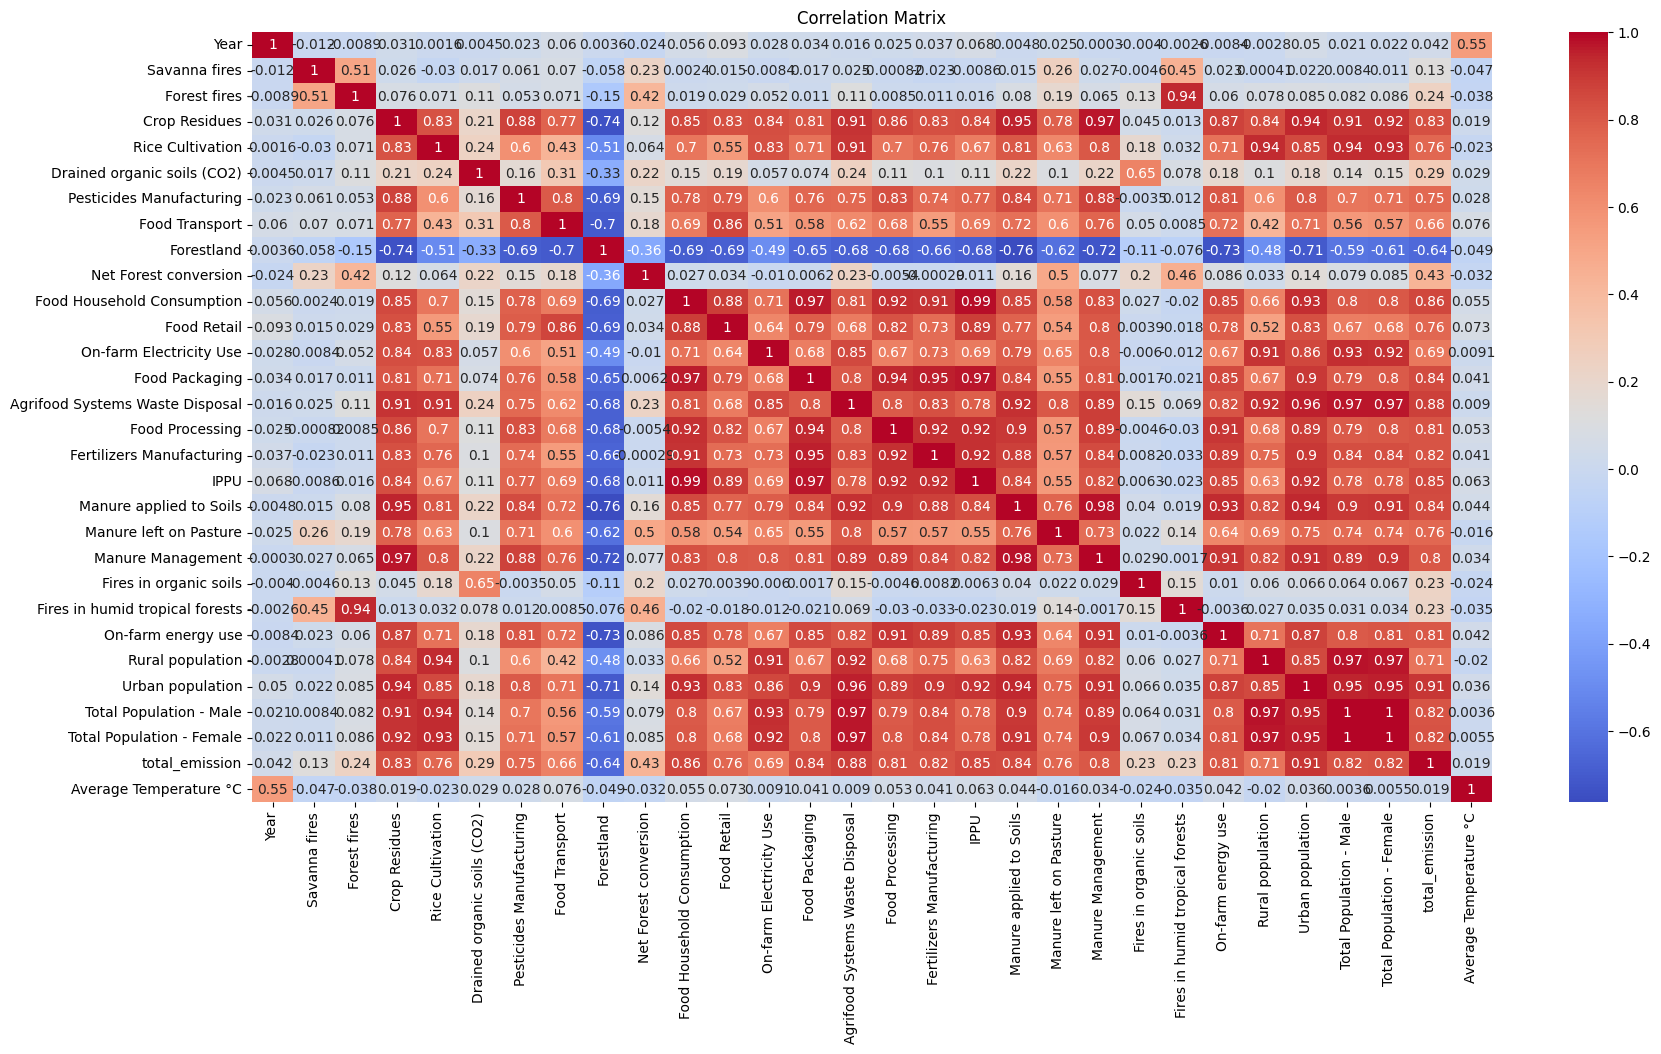

In [32]:
# Optional: Filter for numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [33]:
# Check the data types of your DataFrame
print(df.dtypes)

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_emission, y_emission, test_size=0.3, random_state=42)


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Check if 'target_column' is in categorical_cols to avoid issues
target_column = 'total_emission'  # Replace with your actual target column name
if target_column in categorical_cols:
    categorical_cols.remove(target_column)
if target_column in numeric_cols:
    numeric_cols.remove(target_column)

# Split the data into features and target
X = df.drop(target_column, axis=1)  # Drop target column from features
y = df[target_column]  # Keep the target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle different preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),  # Impute numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ]
)

# Create a pipeline with the preprocessor and the regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # Model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Optionally, print the first few predictions
print(y_pred)


[ 9918.76773647  7542.71911054 99769.66626053 ... 14181.36451655
 21400.50565742  5578.40659433]


Mean Squared Error for total_emission prediction: 7688323694204.794
R-squared score for total_emission prediction: 0.9986403615968704


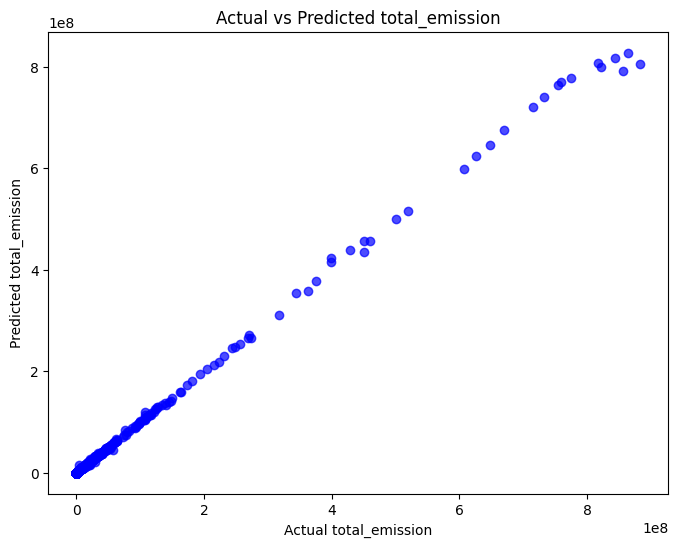

In [42]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error for total_emission prediction:', mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared score for total_emission prediction:', r2)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual total_emission')
plt.ylabel('Predicted total_emission')
plt.title('Actual vs Predicted total_emission')
plt.show()


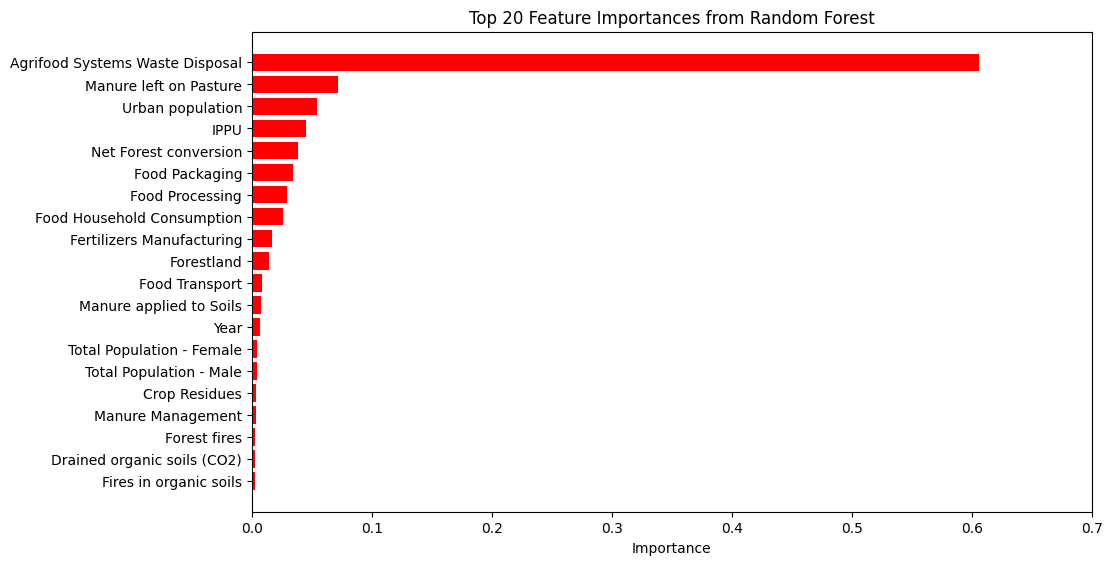

In [37]:
# Plot feature importance
model = pipeline.named_steps['model']  # Access the fitted RandomForestRegressor from the pipeline
importances = model.feature_importances_

# Get the feature names from the preprocessor
# Get numeric feature names
numeric_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numeric_cols)
# Get categorical feature names
categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)

# Combine feature names
feature_names = pd.Series(list(numeric_feature_names) + list(categorical_feature_names))

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Remove features with zero importance
importance_df = importance_df[importance_df['Importance'] > 0]

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select only the top 20 features
top_20_importance_df = importance_df.head(20)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_20_importance_df['Feature'], top_20_importance_df['Importance'], color='red')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances from Random Forest')

# Set x-ticks at intervals of 0.01
plt.xticks(ticks=np.arange(0, top_20_importance_df['Importance'].max() + 0.1, 0.1))

# Adjust the space between axes
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)  # Adjust these values as needed

plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(X_urban, y_urban, test_size=0.3, random_state=42)


NameError: name 'X_urban' is not defined

Mean Squared Error for urban population prediction: 7688323694204.794


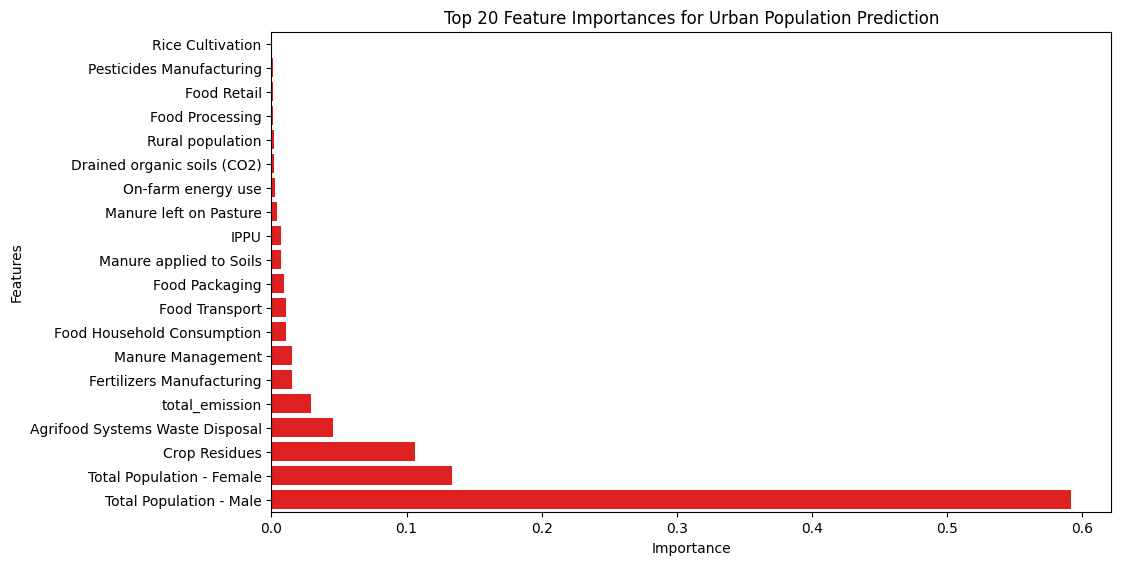

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Sample DataFrame 'df'
# df = pd.read_csv('your_data.csv')  # Load your dataset here

# Step 1: Define features and target for Urban population
X_urban_population = df.drop(['Urban population', 'Year'], axis=1)  # Drop target and non-relevant columns
y_urban_population = df['Urban population']

# Step 2: Create a ColumnTransformer for preprocessing
categorical_cols = X_urban_population.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_urban_population.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),  # Impute numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ]
)

# Step 3: Preprocess the features
X_transformed = preprocessor.fit_transform(X_urban_population)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_urban_population, test_size=0.3, random_state=42)

# Step 5: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error for urban population prediction:', mse)

# Step 7: Feature importance
# Get feature names after transformation
feature_names = (
    numeric_cols + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})

# Remove features with zero importance
importance_df = importance_df[importance_df['Importance'] > 0]

# Sort by importance and select the top 20 features
top_20_importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_importance_df['Importance'], y=top_20_importance_df['Feature'], color='red')
plt.title('Top 20 Feature Importances for Urban Population Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')

# Set x-ticks at intervals of 0.01
plt.xticks(ticks=np.arange(0, top_20_importance_df['Importance'].max() + 0.1, 0.1))

# Adjust the space between axes
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)  # Adjust these values as needed

plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train_urban, X_test_urban, y_train_urban, and y_test_urban are already defined

# Check data types
print("Data types of features in X_train_urban:")
print(X_train_urban.dtypes)

# One-hot encode categorical features
X_train_urban_encoded = pd.get_dummies(X_train_urban, drop_first=True)
X_test_urban_encoded = pd.get_dummies(X_test_urban, drop_first=True)

# Align the train and test datasets by their columns
X_train_urban_encoded, X_test_urban_encoded = X_train_urban_encoded.align(X_test_urban_encoded, join='left', axis=1, fill_value=0)

# Train the model
model_urban = RandomForestRegressor(n_estimators=100, random_state=42)
model_urban.fit(X_train_urban_encoded, y_train_urban)

# Make predictions on the test set
y_pred_urban = model_urban.predict(X_test_urban_encoded)

# Calculate the Mean Squared Error
mse_urban = mean_squared_error(y_test_urban, y_pred_urban)
print('Mean Squared Error for Urban population prediction:', mse_urban)

# Calculate R-squared score
r2_urban = r2_score(y_test_urban, y_pred_urban)
print('R-squared score for Urban population prediction:', r2_urban)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_urban, y_pred_urban, alpha=0.7, color='b')
plt.xlabel('Actual Urban population')
plt.ylabel('Predicted Urban population')
plt.title('Actual vs Predicted Urban population')
plt.show()


Data types of features in X_train_urban:


NameError: name 'X_train_urban' is not defined

In [45]:
# Define features (X) and target (y)
X_rural = df.drop(['Rural population', 'Year'], axis=1)  # Remove 'Rural population' as it's the target
y_rural = df['Rural population']


In [46]:
# Split the data into training and testing sets
X_train_rural, X_test_rural, y_train_rural, y_test_rural = train_test_split(X_rural, y_rural, test_size=0.3, random_state=42)


Data types of features in X_train_rural:
Area                                object
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in humi

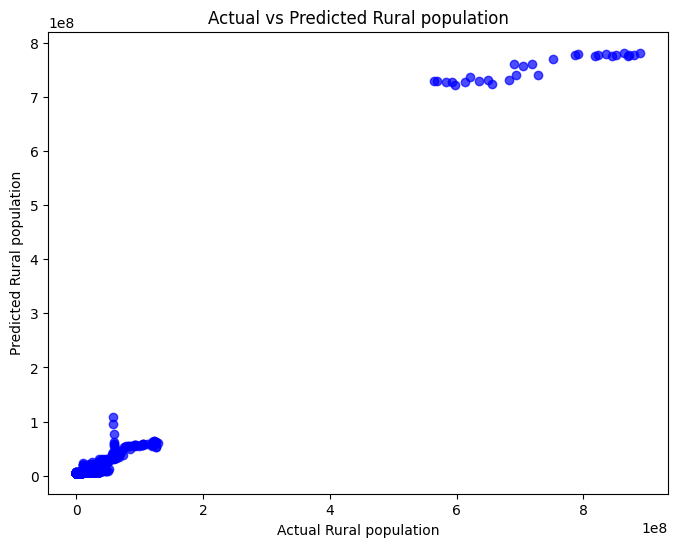

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train_rural, X_test_rural, y_train_rural, and y_test_rural are already defined

# Check data types
print("Data types of features in X_train_rural:")
print(X_train_rural.dtypes)

# One-hot encode categorical features
X_train_rural_encoded = pd.get_dummies(X_train_rural, drop_first=True)
X_test_rural_encoded = pd.get_dummies(X_test_rural, drop_first=True)

# Align the train and test datasets by their columns
X_train_rural_encoded, X_test_rural_encoded = X_train_rural_encoded.align(X_test_rural_encoded, join='left', axis=1, fill_value=0)

# Train the model
model_rural = RandomForestRegressor(n_estimators=100, random_state=42)
model_rural.fit(X_train_rural_encoded, y_train_rural)

# Make predictions on the test set
y_pred_rural = model_rural.predict(X_test_rural_encoded)

# Calculate the Mean Squared Error
mse_rural = mean_squared_error(y_test_rural, y_pred_rural)
print('Mean Squared Error for Rural population prediction:', mse_rural)

# Calculate R-squared score
r2_rural = r2_score(y_test_rural, y_pred_rural)
print('R-squared score for Rural population prediction:', r2_rural)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rural, y_pred_rural, alpha=0.7, color='b')
plt.xlabel('Actual Rural population')
plt.ylabel('Predicted Rural population')
plt.title('Actual vs Predicted Rural population')
plt.show()


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated feature importances
importances_rural = model_rural.feature_importances_

# Get feature names from the training data
feature_names = X_train_rural.columns  # Ensure this matches the data used to train the model

# Check lengths
if len(feature_names) == len(importances_rural):
    # Create a DataFrame for feature importance
    feature_importance_df_rural = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances_rural
    })

    # Sort the DataFrame by importance and select the top 20 features
    top_20_importance_df_rural = feature_importance_df_rural.sort_values(by='Importance', ascending=False).head(20)

    # Plotting feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_20_importance_df_rural['Importance'], y=top_20_importance_df_rural['Feature'], color='red')
    plt.title('Top 20 Feature Importances for Rural Population Prediction')
    plt.xlabel('Importance')
    plt.ylabel('Features')

    # Set x-ticks at intervals of 0.01
    plt.xticks(ticks=np.arange(0, top_20_importance_df_rural['Importance'].max() + 0.1, 0.1))

    # Adjust the space between axes
    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)  # Adjust these values as needed

    plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
    plt.show()
else:
    print("Error: The number of features does not match the number of importance scores.")
    print(f"Number of features: {len(feature_names)}")
    print(f"Number of importance scores: {len(importances_rural)}")


Error: The number of features does not match the number of importance scores.
Number of features: 29
Number of importance scores: 263


In [49]:
for col in X_temperature.select_dtypes(include=['object']).columns:
       le = LabelEncoder()
       X_temperature[col] = le.fit_transform(X_temperature[col])

Length of y_test: 2090
Length of y_pred: 2090
Mean Squared Error for Average Temperature prediction: 7688323694204.794


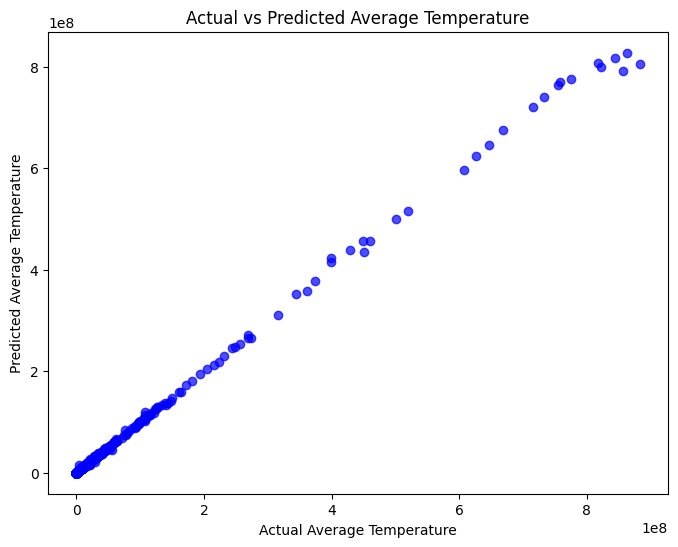

In [50]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Ensure consistent lengths
print(f'Length of y_test: {len(y_test)}')
print(f'Length of y_pred: {len(y_pred)}')

min_length = min(len(y_test), len(y_pred))
y_test = y_test[:min_length]
y_pred = y_pred[:min_length]

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error for Average Temperature prediction:', mse)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Average Temperature')
plt.ylabel('Predicted Average Temperature')
plt.title('Actual vs Predicted Average Temperature')
plt.show()


Adjusting feature names and importances to match lengths...


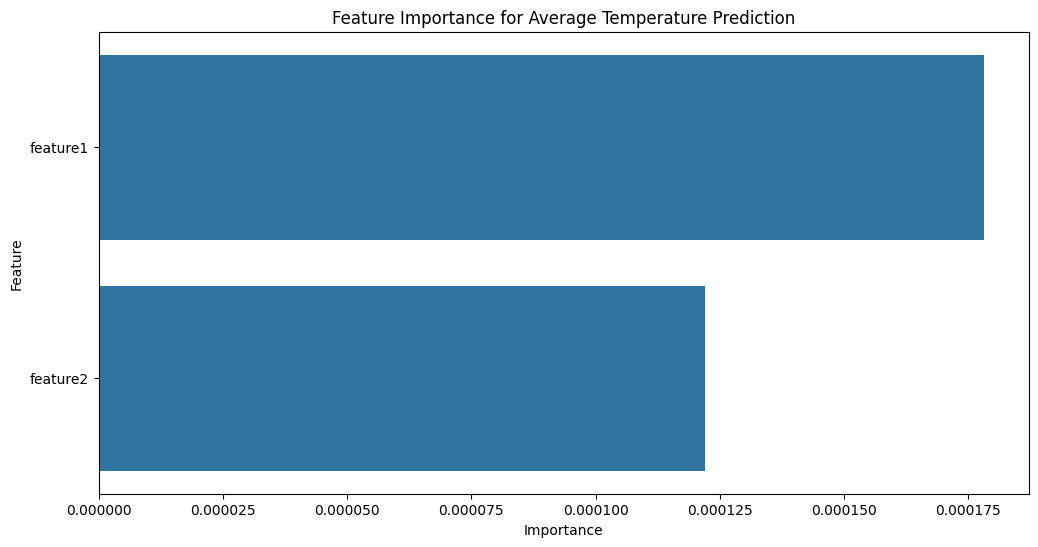

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace this with your actual data loading process)
data = pd.DataFrame({
    'feature1': [1, 2, 3],
    'feature2': [4, 5, 6],
    'temperature': [30, 25, 28],
    'target': [0, 1, 0]
})

# Define features (replace this with your actual feature selection)
X_temperature = data[['feature1', 'feature2']]  # Define relevant features

# Assuming 'model' is already defined and trained
importances = model.feature_importances_
feature_names = X_temperature.columns

# Check the lengths
if len(importances) != len(feature_names):
    print("Adjusting feature names and importances to match lengths...")
    min_length = min(len(importances), len(feature_names))
    importances = importances[:min_length]
    feature_names = feature_names[:min_length]

# Ensure there are importances to plot
if len(importances) > 0:
    # Create a DataFrame for better handling in seaborn
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h')
    plt.title('Feature Importance for Average Temperature Prediction')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("No feature importances to plot.")


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate sample data (you can replace this with your actual dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the best model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Calculate the Mean Squared Error for the best model
best_mse = mean_squared_error(y_test, y_pred_best)
print('Mean Squared Error after tuning:', best_mse)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_sample

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_consumer_waste, y_consumer_waste, test_size=0.3, random_state=42)

In [19]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate sample data (or you can load your actual dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2626.2973852803348


Mean Squared Error for consumer waste prediction: 2626.2973852803348


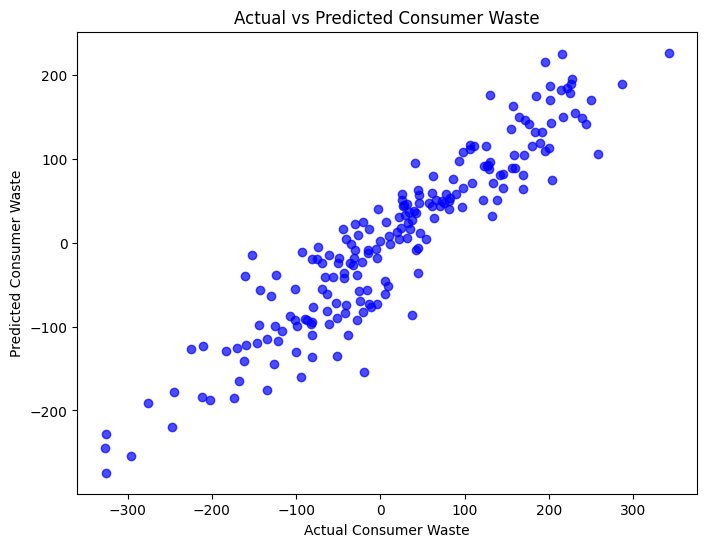

In [20]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error for consumer waste prediction:', mse)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Consumer Waste')
plt.ylabel('Predicted Consumer Waste')
plt.title('Actual vs Predicted Consumer Waste')
plt.show()

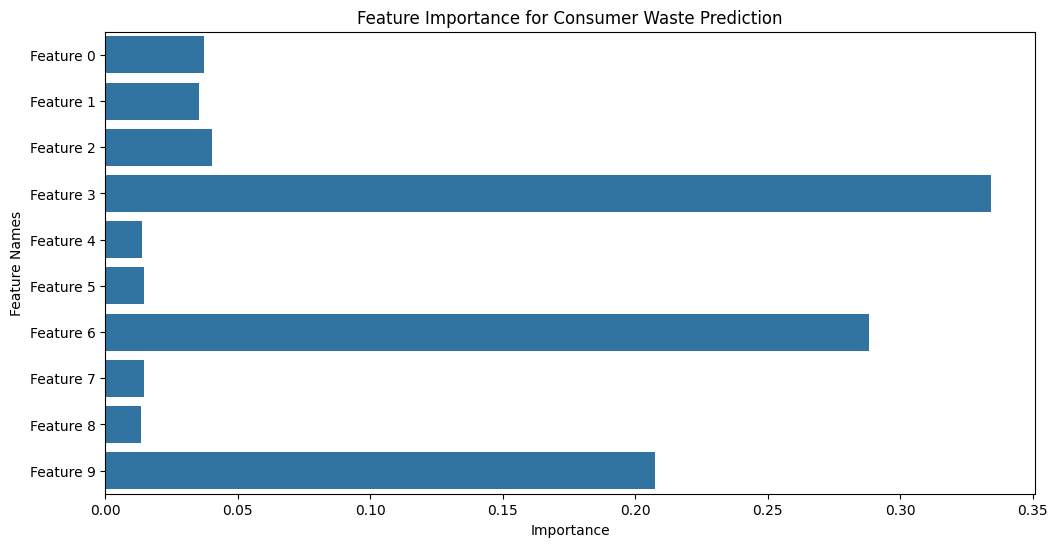

In [23]:
# Assuming you're using X_train (or X_consumer_waste), ensure it is a DataFrame with column names
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = model.feature_importances_

# Assuming X_train is a DataFrame, get feature names
# If you're using X_train and it's a NumPy array, replace it with the actual feature names manually
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]

# Plotting the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Consumer Waste Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Calculate the MSE for the best model
best_mse = mean_squared_error(y_test, y_pred_best)
print('Mean Squared Error after tuning:', best_mse)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samp